In [1]:
# import scipy.signal
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [ ]:
from sonar import sonar
import torch

In [ ]:
# a piece of a new code that containes updated functions from sonar package

son = sonar.Sonar(linear_steps=rad_, max_radius=rad_, normalize=True)
#radii, 
co_occurrence = son.co_occurrence_from_tensor(hists=mat, interpolate=True)
showcase2 = co_occurrence.flatten()#/son.kernel_areas[::-1]


plt.subplot(1,3,1)
plt.imshow(mat.squeeze(),cmap='Greys')

xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    
plt.title('A boolean noise: p(x=1)=0.1')


plt.subplot(1,3,2)
plt.plot(showcase2)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')
ylox = np.linspace(0,1,7)
ytix = ['0','','','1/2','','','1',]
plt.yticks(ylox,ytix)    
plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')
plt.vlines([rad_cell,rad_cell*2],0,showcase2.max(),alpha=0.5)
plt.xlim(0,None)



plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(showcase2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

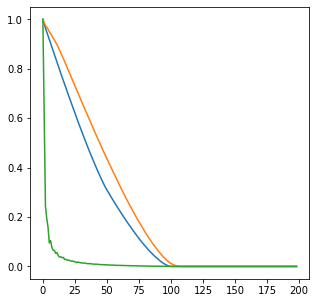

In [2]:
plt.figure(figsize=[5,5])

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=50
conveds = []

for r in range(1,rad_):
#     plt.subplot(6,7,r)
    rad = r
    mat = create_mat(radius=rad_cell,size=1000)
    mat = np.roll(mat,200,0)+np.roll(create_mat(radius=rad_cell-25,size=1000),-200,0)
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    conved = scipy.signal.fftconvolve(mat,kernel,mode='same')
    conveds.append(conved.copy())
    a_conv.append(conved.sum())
    plot1.append((conved*mat).sum()/conved.sum())
    a_masks.append(kernel.sum())
    
plt.plot(plot1)
plot1=np.array(plot1)
plot=np.array(plot1)
a_masks=np.array(a_masks)
a_conv =np.array(a_conv)
conveds = np.array(conveds)

plot2=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=50
conveds = []

for r in range(1,rad_):
#     plt.subplot(6,7,r)
    rad = r
    mat = create_mat(radius=rad_cell,size=1000)
#     mat = np.roll(mat,200,0)+np.roll(create_mat(radius=rad_cell-25,size=1000),-200,0)
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-10,size=rad_*2+1))
    conved = scipy.signal.fftconvolve(mat,kernel,mode='same')
    conveds.append(conved.copy())
    a_conv.append(conved.sum())
    plot2.append((conved*mat).sum()/conved.sum())
    a_masks.append(kernel.sum())
    
plt.plot(plot2)
plot2=np.array(plot2)
a_masks=np.array(a_masks)
a_conv =np.array(a_conv)
conveds = np.array(conveds)

plot3=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=50
conveds = []

for r in range(1,rad_):
#     plt.subplot(6,7,r)
    rad = r
    mat = mat*0
    mat[450:550,499:501]=1 #create_mat(radius=rad_cell,size=1000)
#     mat = np.roll(mat,200,0)+np.roll(create_mat(radius=rad_cell-25,size=1000),-200,0)
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    conved = scipy.signal.fftconvolve(mat,kernel,mode='same')
    conveds.append(conved.copy())
    a_conv.append(conved.sum())
    plot3.append((conved*mat).sum()/conved.sum())
    a_masks.append(kernel.sum())
    
plt.plot(plot3)
plot3=np.array(plot3)
a_masks=np.array(a_masks)
a_conv =np.array(a_conv)
conveds = np.array(conveds)

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


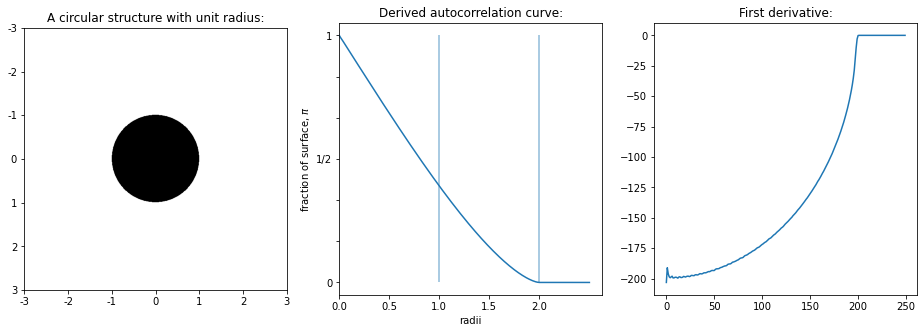

In [3]:
plt.figure(figsize=[16,5])

import sonar
import torch

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))



plot0=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.array([create_mat(radius=rad_cell,size=600)])

son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

plot0 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

plt.subplot(1,3,1)
plt.imshow(mat,cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('A circular structure with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot0)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,mat.sum(),mat.sum()//12)
ytix = ['0','','','1/2','','','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')

plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

plt.xlim(0,None)

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(plot0)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# plt.savefig('./output/unit_circle.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


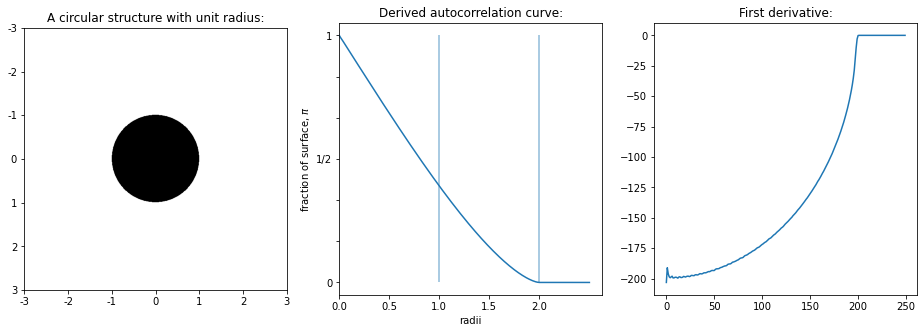

In [4]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot0=[]
rad_ = 250
rad_cell=100
conveds = []

mat = create_mat(radius=rad_cell,size=600)

mat = np.array([create_mat(radius=rad_cell,size=600)])

son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=250, plot=False)
dm = son.distance_maps

plot0 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

plt.subplot(1,3,1)
plt.imshow(mat,cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('A circular structure with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot0)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,mat.sum(),mat.sum()//12)
ytix = ['0','','','1/2','','','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')

plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

plt.xlim(0,None)

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(plot0)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

plt.savefig('./output/unit_circle.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


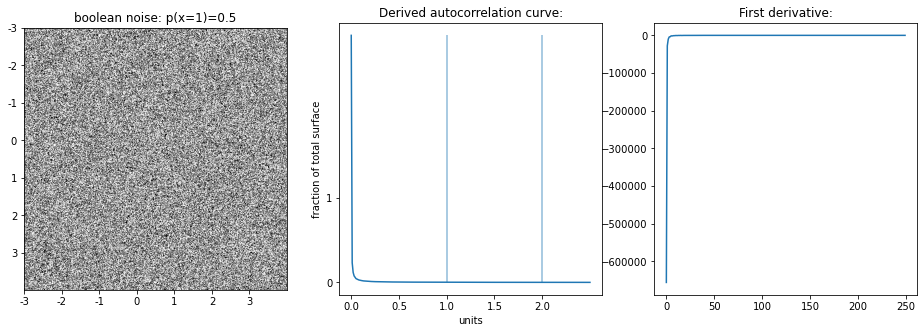

In [5]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.random.random([1,1200,1200])>0.5#create_mat(radius=rad_cell,size=600)
# mat = np.array([create_mat(radius=rad_cell,size=600)])

son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=250, plot=False, edge_correction=True)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

plt.subplot(1,3,1)
plt.imshow(mat[250:-250,250:-250],cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('boolean noise: p(x=1)=0.5')

plt.subplot(1,3,2)
plt.plot(plot1)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,mat[250:-250,250:-250].sum(),2)
ytix = ['0','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox,ytix)    

plt.xlabel('units')
plt.ylabel('fraction of total surface')

plt.vlines([rad_cell,rad_cell*2],0,plot1.max(),alpha=0.5)

plt.subplot(1,3,3)
plt.title('First derivative:')
plt.plot(np.diff(plot1))

plt.savefig('./output/bool_noise.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


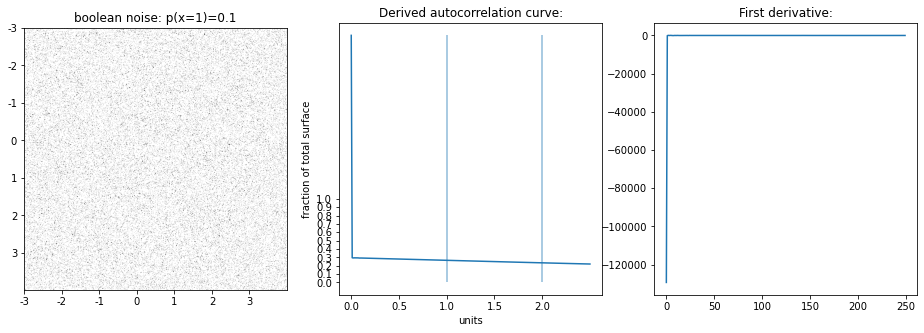

In [6]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.random.random([1,1200,1200])<0.1

son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

plt.subplot(1,3,1)
plt.imshow(mat[250:-250,250:-250],cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('boolean noise: p(x=1)=0.1')

plt.subplot(1,3,2)
plt.plot(plot1)

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,mat[250:-250,250:-250].sum(),11)
# ytix = ['0','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox,[ '%.1f'%f for f in ylox/mat[250:-250,250:-250].sum()])    

plt.xlabel('units')
plt.ylabel('fraction of total surface')

plt.vlines([rad_cell,rad_cell*2],0,plot1.max(),alpha=0.5)

plt.subplot(1,3,3)
plt.title('First derivative:')
plt.plot(np.diff(plot1))

plt.savefig('./output/bool_noise_0_1.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


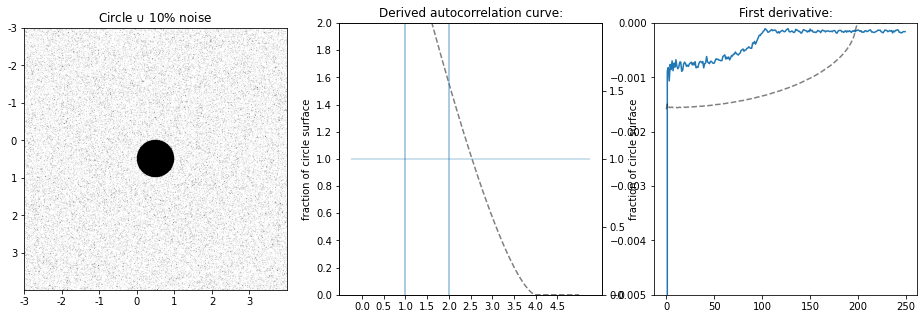

In [7]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 250
rad_cell=50
conveds = []

ftr = np.random.random([1600,1600])#create_mat(radius=rad_cell,size=600)
mat = create_mat(radius=rad_cell,size=1600)
surf = mat.sum()
# print((1200-500)**2-mat.sum())
# kewl
mat[ftr<0.1]=1
mat=np.array([mat])
# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat,kernel,mode='same')

#     plot1.append((conved*mat)[250:-250,250:-250].sum())
    
son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

# plot1=np.array(plot1)

plt.subplot(1,3,1)
plt.imshow(mat[450:-450,450:-450],cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('Circle $\cup$ 10% noise')

ax1 = plt.subplot(1,3,2)

plt.plot(plot1)
plt.plot(plot0,'k',linestyle='dashed',alpha=0.5)
xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,rad_cell**2*np.pi*2,11)
# ylox = np.linspace(0,mat[250:-250,250:-250].sum(),11)
# plt.yticks(ylox,[ '%.1f'%f for f in ylox/mat[250:-250,250:-250].sum()])
plt.yticks(ylox,[ '%.1f'%f for f in ylox/(rad_cell**2*np.pi)])
ax1.set_ylabel('fraction of circle surface')  # we already handled the x-label with ax1
plt.ylim((0,rad_cell**2*np.pi*2))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'


ylox = np.arange(0,mat[250:-250,250:-250].sum(),surf//2)
plt.yticks(ylox,ylox/surf)    
plt.xlabel('units')
plt.ylabel('fraction of circle surface')
plt.ylim(*ax1.get_ylim())
plt.plot(plot1)

plt.vlines([rad_cell,rad_cell*2],0,plot1.max(),alpha=0.5)
plt.hlines([surf,],*ax1.get_xlim(),alpha=0.3)

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(plot1/mat[250:-250,250:-250].sum())/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

diff = np.diff(plot0/mat[250:-250,250:-250].sum())/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'k',linestyle='dashed',alpha=0.5)

plt.ylim(-0.005,0)
plt.savefig('./output/circle_bool_noise.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


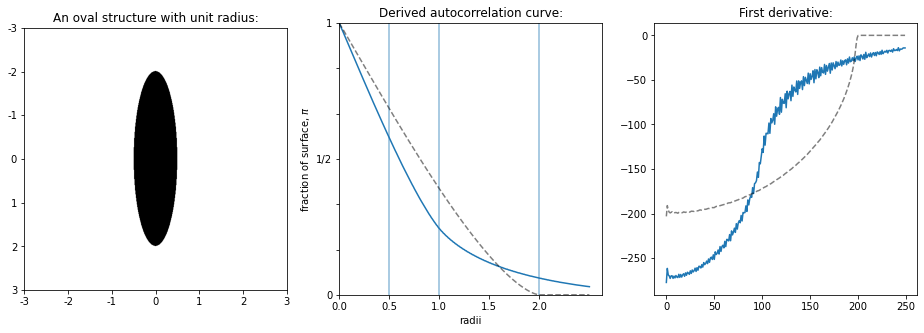

In [8]:
plt.figure(figsize=[16,5])


def create_oval_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-((2*X)**2+(Y/2)**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 250
rad_cell=100
conveds = []

mat = np.array([create_oval_mat(radius=rad_cell,size=600)])

# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat,kernel,mode='same')

#     plot1.append((conved*mat).sum())
    
    
son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

    
plot1=np.array(plot1)

plt.subplot(1,3,1)
plt.imshow(mat,cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('An oval structure with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot1)
plt.plot(plot0,'k',linestyle='dashed',alpha=0.5)
xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,mat.sum(),mat.sum()//12)
ytix = ['0','','','1/2','','','1',]
# ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')

plt.vlines([rad_cell,rad_cell/2,rad_cell*2],0,plot1.max(),alpha=0.5)

plt.ylim(0,mat.sum())

plt.xlim(0,None)

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

diff = np.diff(plot0)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]

plt.plot(diff,'k',linestyle='dashed',alpha=0.5)

plt.savefig('./output/oval.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


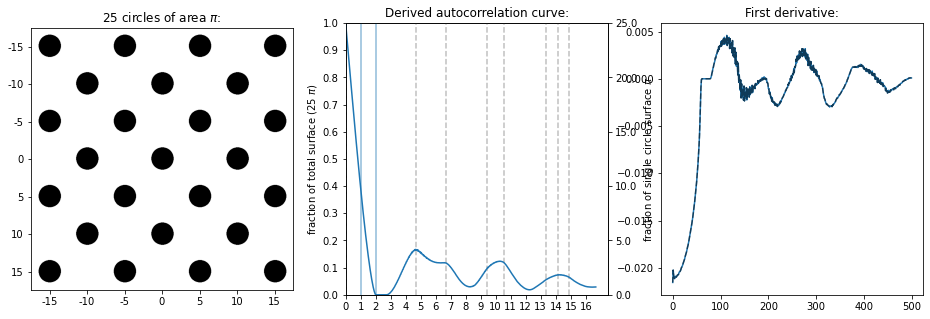

In [9]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 500
rad_cell=30
conveds = []

mat = create_mat(radius=rad_cell,size=1200)

surf = mat.sum()

for i in range(20):
    mat = mat+np.roll(mat,200,0)

mat = mat + np.roll(np.roll(mat,int(100),0),int(100),1)

for i in range(20):
    mat = mat+np.roll(mat,200,1)

mat[:250]=0
mat[-250:]=0
mat[:,:250]=0
mat[:,-250:]=0
    
mat=np.array([mat])    

# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat,kernel,mode='same')
    
#     plot1.append((conved*mat)[250:-250,250:-250].sum())
    

son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

    
plot1=np.array(plot1)

plt.subplot(1,3,1)
plt.imshow(mat[250:-250,250:-250],cmap='Greys')
    
xlox = np.linspace(0,700,15)[1::2]
xtix = [int(f) for f in (xlox-350)/20]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('25 circles of area $\pi$:')

# r45 = (2*30**2)**0.5/2
# roll45 = (2*100**2)**0.5
# plt.plot([350+r45,100+350-r45],[350+r45,100+350-r45],'r')

# plt.plot([350+r45,100+350+r45],[350-r45,100+350-r45],'orange')

ax1 = plt.subplot(1,3,2)

# plt.plot(plot1/3*np.arange(len(plot1))**0.5,'r')
xlox = np.arange(0,rad_,rad_cell)
xtix = xlox//rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,mat[250:-250,250:-250].sum(),11)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/mat[250:-250,250:-250].sum()])
ax1.set_ylabel('fraction of total surface (25 $\pi$)')  # we already handled the x-label with ax1

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'

surf = np.pi*rad_cell**2
plt.xlabel('radii')

ylox = np.arange(0,mat[250:-250,250:-250].sum(),surf*5)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/surf])    
plt.xlabel('units')
plt.ylabel('fraction of single circle surface $\pi$')
plt.ylim(*ax1.get_ylim())
plt.plot(plot1)
plt.xlim(0,None)
plt.vlines([rad_cell,rad_cell*2],0,plot1.max(),alpha=0.5)

plt.xlabel('radii')

dists=[]
for i in range(0,5):
    for j in range(0,5):
        if  not (i + j)%2:
            val = ((i*100)**2+(j*100)**2)**0.5
            if not val in dists:
                dists.append(val)
        
plt.vlines(dists,0,plot1.max(),alpha=0.5,linestyles='dashed',color='grey')


plt.subplot(1,3,3)

plt.title('First derivative:')
diff = np.diff(plot1/mat[250:-250,250:-250].sum())/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# diff = np.diff(plot0/mat[250:-250,250:-250].sum())/3
# diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
# diff[-3:]=diff[-3]
plt.plot(diff,'k',linestyle='dashed',alpha=0.5)
plt.savefig('./output/multi_circles.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


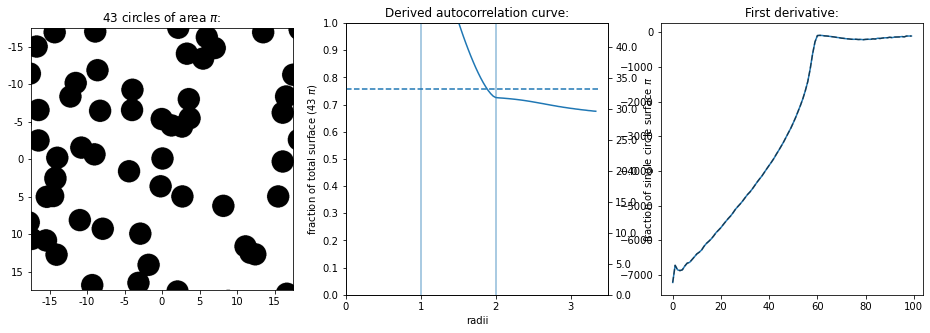

In [10]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 100
rad_cell=30
conveds = []

poss_x=[]
poss_y=[]

mat = create_mat(radius=rad_cell,size=1200)

for i in range(150):
    
    rollx = np.random.randint(-600,600)
    rolly = np.random.randint(-600,600)
    mat = mat+np.roll(np.roll(create_mat(radius=rad_cell,size=1200),rollx,0),rolly,1)
    poss_x.append(rollx)
    poss_y.append(rolly)


son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]

    
# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat,kernel,mode='same')
    
#     plot1.append((conved*mat)[250:-250,250:-250].sum())
    
# plot1=np.array(plot1)

count = int(mat[250:-250,250:-250].sum()/surf)

plt.subplot(1,3,1)
plt.imshow(mat[250:-250,250:-250],cmap='Greys')
    
xlox = np.linspace(0,700,15)[1::2]
xtix = [int(f) for f in (xlox-350)/20]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title(str(count)+' circles of area $\pi$:')


ax1 = plt.subplot(1,3,2)

xlox = np.arange(0,rad_,rad_cell)
xtix = xlox//rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,mat[250:-250,250:-250].sum(),11)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/mat[250:-250,250:-250].sum()])
ax1.set_ylabel('fraction of total surface (%i $\pi$)'%count)  # we already handled the x-label with ax1
plt.xlabel('radii')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'

surf = np.pi*rad_cell**2

ylox = np.arange(0,mat[250:-250,250:-250].sum(),surf*5)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/surf])    
plt.xlabel('units')
plt.ylabel('fraction of single circle surface $\pi$')
plt.ylim(*ax1.get_ylim())
plt.plot(plot1)
plt.xlim(0,None)
plt.vlines([rad_cell,rad_cell*2],0,plot1.max(),alpha=0.5)

plt.hlines([mat[250:-250,250:-250].mean()*plot1[0]],0,len(plot1),linestyles='dashed')
# plt.vlines(dists,0,plot1.max(),alpha=0.5,linestyles='dashed',color='grey')
plt.text(200,mat[250:-250,250:-250].mean()*plot1[0]+3000,'tissue mean')

x = np.arange(len(plot1))

y1=(x)*(r**2-(x/2)**2)**0.5
y2=r**2*np.arcsin((x/2)/r)*2

plt.subplot(1,3,3)

plt.title('First derivative:')

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# diff = np.diff(plot0)/3
# diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
# diff[-3:]=diff[-3]
plt.plot(diff,'k',linestyle='dashed',alpha=0.5)

plt.savefig('./output/multi_circles_dist.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


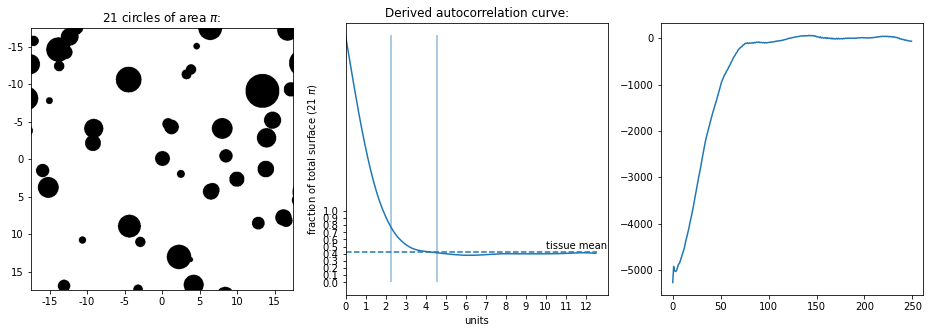

In [11]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
rad_ = 250
rad_cell = 20
std_rad = 10
conveds = []
radii = []

poss_x=[]
poss_y=[]

mat = create_mat(radius=rad_cell,size=1200)

for i in range(150):
    
    rollx = np.random.randint(-600,600)
    rolly = np.random.randint(-600,600)
    radius = max(0,np.random.normal(rad_cell,std_rad))
    radii.append(radius)
    mat = mat+np.roll(np.roll(create_mat(radius=radius,size=1200),rollx,0),rolly,1)
    poss_x.append(rollx)
    poss_y.append(rolly)




son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm.flatten()/son.kernel_areas[::-1]


count = int(mat[250:-250,250:-250].sum()/surf)

plt.subplot(1,3,1)
plt.imshow(mat[250:-250,250:-250],cmap='Greys')
    
xlox = np.linspace(0,700,15)[1::2]
xtix = [int(f) for f in (xlox-350)/20]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title(str(count)+' circles of area $\pi$:')


ax1 = plt.subplot(1,3,2)

xlox = np.arange(0,rad_,rad_cell)
xtix = xlox//rad_cell
plt.xticks(xlox,xtix)    
plt.title('Derived autocorrelation curve:')

ylox = np.linspace(0,mat[250:-250,250:-250].sum(),11)
plt.yticks(ylox,[ '%.1f'%f for f in ylox/mat[250:-250,250:-250].sum()])
ax1.set_ylabel('fraction of total surface (%i $\pi$)'%count)  # we already handled the x-label with ax1
plt.xlabel('radii')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'

surf = np.pi*rad_cell**2

ylox = np.arange(0,mat[250:-250,250:-250].sum(),surf*5)
# plt.yticks(ylox,[ '%.1f'%f for f in ylox/surf])    
plt.xlabel('units')
# plt.ylabel('fraction of single circle surface $\pi$')
# plt.ylim(*ax1.get_ylim())
plt.plot(plot1)
plt.xlim(0,None)
ln = np.max(np.array(radii))
plt.vlines([ln,ln*2],0,plot1.max(),alpha=0.5)

plt.hlines([mat[250:-250,250:-250].mean()*plot1[0]],0,len(plot1),linestyles='dashed')
# plt.vlines(dists,0,plot1.max(),alpha=0.5,linestyles='dashed',color='grey')
plt.text(200,mat[250:-250,250:-250].mean()*plot1[0]+3000,'tissue mean')

# x=np.arange(len(plot1))
# for r in[rad_cell-std_rad,rad_cell,rad_cell+std_rad]:
#     y1=(x)*(r**2-(x/2)**2)**0.5
#     y2=r**2*np.arcsin((x/2)/r)*2
#     denominator = (np.pi*r**2)
#     mean = mat[250:-250,250:-250].mean()*plot1[0]
#     plt.plot((1-(y1+y2)/denominator)*(plot1[0]-mean)+mean,'grey')#plot1[0])

# plt.plot((2.1*plot0+mat[250:-250,250:-250].mean()*plot1[0])[::5])
plt.subplot(1,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)
# y1=(x)*(r**2-(x/2)**2)**0.5
# y2=r**2*np.arcsin((x/2)/r)*2
# denominator = (np.pi*r**2)
# mean = mat[250:-250,250:-250].mean()*plot1[0]
# plt.plot((1-(y1+y2)/denominator)*(plot1[0]-mean)+mean,'grey')#plot1[0])

plt.savefig('./output/multi_circles_size.svg')

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (9).

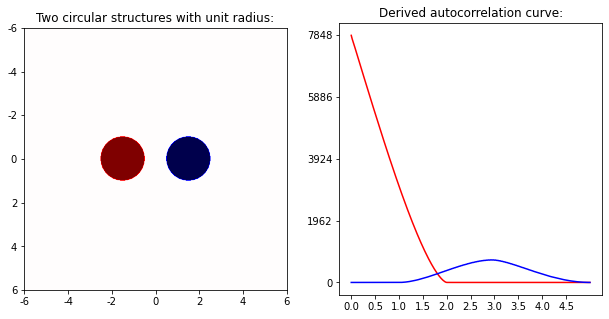

In [13]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
plot2=[]
rad_ = 250
rad_cell=50
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell,size=600),-75,1)
mat2 = np.roll(mat1,150,1)
       
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat1,kernel,mode='same')

#     plot1.append((conved*mat1).sum())
#     plot2.append((conved*mat2).sum())
    


son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat1,mat2]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm[0,0]/son.kernel_areas[::-1]
plot2 = dm[0,1]/son.kernel_areas[::-1]

    
# plot1=np.array(plot1)
# plot2=np.array(plot2)

plt.subplot(1,3,1)
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
xlox = np.linspace(0,mat1.shape[0],7)
xtix = [str(int(i)) for i in (xlox-mat1.shape[0]//2)/50]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('Two circular structures with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot1,'r')
plt.plot(plot2,'b')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,rad_cell**2*np.pi,rad_cell**2*np.pi//8)
ytix = np.round(ylox/rad_cell**2/np.pi*2*10)/10
# # ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

# plt.xlabel('radii')
# plt.ylabel('fraction of surface, $\pi$')

# plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

# plt.xlim(0,None)

plt.subplot(1,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'b')



In [ ]:
plt.figure(figsize=[16,8])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
plot2=[]
rad_ = 250
rad_cell=50
conveds = []

mat1 = create_mat(radius=rad_cell,size=600)
mat2 = create_mat(radius=rad_cell*2,size=600)
mat2[mat1>0]=0
       
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')


son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat1,mat2]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm[0,0]/son.kernel_areas[::-1]
plot2 = dm[0,1]/son.kernel_areas[::-1]

plt.subplot(2,3,1)
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
xlox = np.linspace(0,mat1.shape[0],7)
xtix = [str(int(i)) for i in (xlox-mat1.shape[0]//2)/50]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('Two circular structures with unit radius:')

plt.subplot(2,3,2)
plt.plot(plot1,'r')
plt.plot(plot2,'b')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Two circular structures with unit radius:')

plt.subplot(2,3,5)

plot3 = dm[1,0]/son.kernel_areas[::-1]
plot4 = dm[1,1]/son.kernel_areas[::-1]

plt.plot(plot3,'r')
plt.plot(plot4,'b')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    


plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,rad_cell**2*np.pi,rad_cell**2*np.pi//8)
ytix = np.round(ylox/rad_cell**2/np.pi*2*10)/10

plt.subplot(2,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'b')


plt.subplot(2,3,6)

diff = np.diff(plot3)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot4)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'b')

stop

Creating ambient maps...


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cell_matrix = torch.tensor(cell_matrix,device=device)


/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/sonar.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(tissue_mask, dtype=torch.float, device=device)



Integrating data...


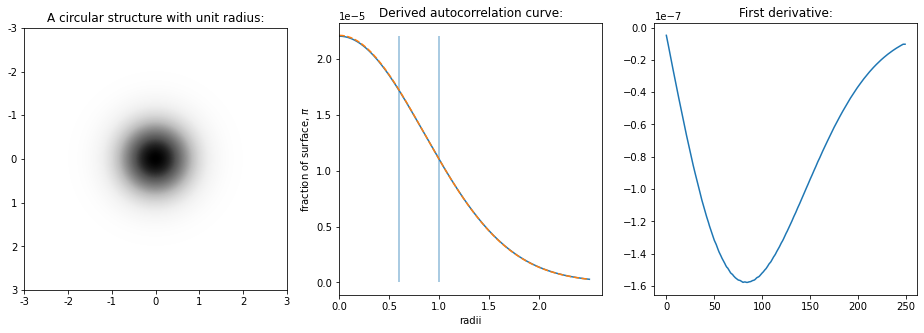

In [72]:
## Test Gaussian bell structure

def create_gaussian(size=500,sigma=30):
    span = np.linspace(-size/2,size/2,size)
    X,Y = np.meshgrid(span,span)
    
    return  (1/(2*np.pi*sigma**2))*\
        np.exp(0.5*-(X**2+Y**2)/sigma**2)


plt.figure(figsize=[16,5])

import sonar
import torch

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))



plot0=[]
rad_ = 250
rad_cell=100
conveds = []

sigma=60

mat = np.array([(create_gaussian(size=600,sigma=sigma))])
# mat/=mat.sum()
son = sonar.Sonar()
son.run_pipeline(cell_matrix=mat,max_radius=rad_, plot=False)
dm = son.distance_maps

plot0 = dm.flatten()/son.kernel_areas[::-1]
mat=mat.squeeze()

plt.subplot(1,3,1)
plt.imshow(mat,cmap='Greys')
    
xlox = np.linspace(0,600,7)
xtix = [str(int(i)) for i in (xlox-300)/100]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('A circular structure with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot0)
plt.plot(np.exp(-span**2/(4*sigma**2))/(4*np.pi*(sigma)**2),linestyle='dashed')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

# ylox = np.arange(0,mat.sum(),mat.sum()//12)
# ytix = ['0','','','1/2','','','1',]
# # ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
# plt.yticks(ylox[::2],ytix)    

plt.xlabel('radii')
plt.ylabel('fraction of surface, $\pi$')

plt.vlines([sigma,sigma*5/3,],0,plot0.max(),alpha=0.5)

plt.xlim(0,None)

plt.subplot(1,3,3)
plt.title('First derivative:')
diff = np.diff(plot0)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff)

# plt.savefig('./output/unit_circle.svg')

In [ ]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
plot2=[]
plot_bg = []
rad_ = 250
rad_cell1=10
rad_cell2=60
rad_bg = 200
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell1,size=600),-75,1)
mat2 = np.roll(create_mat(radius=rad_cell2,size=600),75,1)
# mat2 = np.roll(mat2,150,1)
mat_bg = create_mat(radius=rad_bg,size=600)

# plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    


son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat1,mat2,mat_bg]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm[0,0]/son.kernel_areas[::-1]
plot2 = dm[0,1]/son.kernel_areas[::-1]
plot_bg=dm[0,2]/son.kernel_areas[::-1]

plt.subplot(1,3,1)
# plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')


canvas = np.zeros(mat1.shape+(3,))

canvas[~mat_bg,:] = 1
canvas[mat1,0] = 1
canvas[mat2,2] = 1

plt.imshow(canvas)
xlox = np.linspace(0,mat1.shape[0],7)
xtix = [str(int(i)) for i in (xlox-mat1.shape[0]//2)/50]
# plt.xticks(xlox,xtix)    
# plt.yticks(xlox,xtix)    
ax = plt.gca()
circle = plt.Circle((300-75, 300), 120, color='g',fill=False)
ax.add_artist(circle)

plt.title('Two circular structures with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot1,'r')
plt.plot(plot2,'b')
plt.plot(plot_bg,'k')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,rad_cell**2*np.pi,rad_cell**2*np.pi//8)
ytix = np.round(ylox/rad_cell**2/np.pi*2*10)/10
# # ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

# plt.xlabel('radii')
# plt.ylabel('fraction of surface, $\pi$')

# plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

# plt.xlim(0,None)

plt.subplot(1,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'b')



In [ ]:
%load_ext autoreload

%autoreload 2

In [ ]:
plt.figure(figsize=[16,5])

def conv(arr,n):
    return np.convolve(arr,np.ones((n,)),mode='valid')


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
plot2=[]
rad_ = 250
rad_cell=50
conveds = []

mat1 = np.roll(create_mat(radius=rad_cell,size=600),-125,1)
mat2 = [np.roll(mat1,n,1) for n in  range(0,250,20)]
       

son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat1]+mat2),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm[0,0]/son.kernel_areas[::-1]
plot2 = dm[0,1]/son.kernel_areas[::-1]


mat = np.array([mat1]+mat2)
plot = dm[0]/son.kernel_areas[::-1]
# plot = plot/plot.max(1)[:,None]

# for i,d in enumerate(plot[-1:]):
    
plt.plot(conv(np.diff(plot[6]).T,3),)#c=[0,1-i/plot.shape[0],0])#, aspect='auto')  

plt.show()

In [ ]:
rad_cell2/r

In [ ]:
from scipy.special import gammaincc

maxs = []

plt.figure(figsize=[15,5])

def conv(arr,n):
    return np.convolve(arr,np.ones((n,)),mode='valid')

for r in range(1,130):
    plt.subplot(1,2,1)
    plt.plot(plot_bg)
    plt.plot(plot2)
    plt.plot(plot1)

    plt.subplot(1,2,2)

#     r = 20
    factor_1 = max((rad_cell1*np.pi/2)/r,1)
    factor_2 = max(r-(rad_cell1+rad_cell2)*2,0)

#     print(r/(rad_cell1+rad_cell2),np.pi/2)

    factor = min(r/(rad_cell1+rad_cell2)/2*np.pi/2,np.pi/2)
    factor = 1#np.sin(factor)

    p_1 = plot1[0]/mat_bg.sum()
    p_2 = mat2.sum()/mat_bg.sum()
    space = conv(plot_bg,r)
    exp = space/plot1[0]/(np.pi*rad_cell2**2)*p_2
    # plt.plot(gammaincc(exp,conv()))
    obs = conv(plot2,r)/(plot1[0])/((np.pi*rad_cell2**2))/factor
    plt.plot(obs,c=[0,r/130,0])
#     plt.plot(exp)
#     plt.plot(gammaincc(obs,exp))

#     plt.title('F:%f | F2:%f | VMAX%f'%(factor,factor_2,obs.max()))
    maxs.append(obs.max()*factor)
# plt.plot(conv(plot2,1)*10)#)/plot_bg)
# plt.plot(plot1/plot_bg)

In [ ]:
from scipy.special import gammaincc

maxs = []

# plt.figure(figsize=[15,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
# plot2=[]
# rad_ = 250
# rad_cell=50
# conveds = []

mat1 = create_mat(radius=rad_cell,size=600)
# mat2 = np.roll(mat1,150,1)
       
# plt.imshow(mat1.astype(np.int),cmap='seismic')
    
for r in range(1,25,1):
#     plt.figure()
    rad = r
    
    kernel=create_mat(radius=rad, size=600)
#     kernel=kernel/kernel.sum()
    conved = scipy.signal.fftconvolve(mat1,kernel,mode='same')

#     plt.imshow(conved[200:-200,200:-200])
    plot1.append(np.sum(conved*mat1))
    plt.plot(conved[300,250:-250],color=[0,rad/25,0])
#     plot1.append((conved*mat1).sum())
#     plot2.append((conved*mat2).sum())
 
# plt.figure()
# plt.plot((plot1))
# print(np.max(plot1))
# plot1=np.array(plot1)
# plot2=np.array(plot2)


In [ ]:
50**2*50**2*np.pi**2

In [ ]:
# plt.plot(maxs)

R = rad_cell2
r = np.arange(129)

factor = (np.pi*R**2/2)-(R**2*np.arccos(r/R))+(r*(R**2-r**2)**0.5)
plt.plot(r*2,factor/(rad_cell2**2*(np.pi-1)+rad_cell2))
plt.plot(maxs)


In [ ]:
plt.plot(maxs)
r=(rad_cell1+rad_cell2)+30
y1=2/np.pi*(np.arccos(x/(2*r)))
y2=-(x*np.sqrt(r**2-(x/2)**2))/(r**2*np.pi)
# plt.plot(1-y1-y2)
x = np.arange(0,120)
plt.plot(np.sin(x/(rad_cell1+rad_cell2)/2*np.pi/2)**0.7)
plt.vlines([(rad_cell1+rad_cell2)*2],0,1)
# plt.plot(np.arange(1,120)**0.5)

In [ ]:
plt.figure(figsize=[16,5])


# def create_mat(radius=20,size=500):
#     span = np.linspace(-1,1,size)
#     X,Y = np.meshgrid(span,span)
    
#     cone = 1-(X**2+Y**2)**0.5
    
#     return (cone>(1-(radius/size*2)))

# plot1=[]
# plot2=[]
# rad_ = 600
# rad_cell=25
# conveds = []

# mat1 = create_mat(radius=rad_cell,size=1200)

# surf = mat.sum()

# for i in range(1):
#     mat1 = mat1+np.roll(mat1,100,0)

# mat1 = mat1 + np.roll(np.roll(mat1,int(50),0),int(50),1)

# for i in range(20):
#     mat1 = mat1+np.roll(mat1,100,1)

# mat1 =  np.roll(mat1,int(80),0)

    
# # mat1[:250]=0
# # mat1[-250:]=0
# mat1[:,:200]=0
# mat1[:,-200:]=0

# mat2 = np.zeros_like(mat)
# mat2[:] = mat1[::-1]  
# # mat1[500:] = 0 

    
# plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
# for r in range(1,rad_):

#     rad = r
    
#     kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
#     kernel=kernel/kernel.sum()
#     conved = scipy.signal.fftconvolve(mat1,kernel,mode='same')

#     plot1.append((conved*mat1).sum())
#     plot2.append((conved*mat2).sum())
    
plot1=np.array(plot1)
plot2=np.array(plot2)

plt.subplot(1,3,1)
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
xlox = np.linspace(0,mat1.shape[0],7)
xtix = [str(int(i)) for i in (xlox-mat1.shape[0]//2)/50]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('Circular structures forming layers:')

plt.subplot(1,3,2)
plt.plot(plot1,'r')
plt.plot(plot2,'b')

xlox = np.arange(0,rad_,rad_cell*5)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived correlation curves:')

ylox = np.arange(0,rad_cell**2*np.pi*33,rad_cell**2*np.pi*2)
ytix = np.round(ylox/rad_cell**2/np.pi*2*10)/10
# # ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    


# plt.xlabel('radii')
# plt.ylabel('fraction of surface, $\pi$')

# plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

# plt.ylim(0,40000)

plt.subplot(1,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
# plt.plot(diff,'b')


In [ ]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
plot2=[]
rad_ = 500
rad_cell=50
conveds = []

mat1 = create_mat(radius=rad_cell,size=1200)

surf = mat.sum()

for i in range(20):
    mat1 = mat1+np.roll(mat1,200,0)

mat1 = mat1 + np.roll(np.roll(mat1,int(100),0),int(100),1)

for i in range(20):
    mat1 = mat1+np.roll(mat1,200,1)

mat1[:250]=0
mat1[-250:]=0
mat1[:,:250]=0
mat1[:,-250:]=0

mat2 = np.zeros_like(mat)

for i in range(250,950,200):
    mat2[i:i+100] = mat1[i:i+100]  
    mat1[i:i+100] = 0 
    
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    

son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat1,mat2]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm[0,0]/son.kernel_areas[::-1]
plot2 = dm[0,1]/son.kernel_areas[::-1]



plt.subplot(1,3,1)
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
xlox = np.linspace(0,mat1.shape[0],7)
xtix = [str(int(i)) for i in (xlox-mat1.shape[0]//2)/50]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('Two circular structures with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot1,'r')
plt.plot(plot2,'b')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,rad_cell**2*np.pi,rad_cell**2*np.pi//8)
ytix = np.round(ylox/rad_cell**2/np.pi*2*10)/10
# # ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

# plt.xlabel('radii')
# plt.ylabel('fraction of surface, $\pi$')

# plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

# plt.xlim(0,None)

plt.subplot(1,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
# plt.plot(diff,'b')


In [ ]:
plt.figure(figsize=[16,5])


def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot1=[]
plot2=[]
rad_ = 500
rad_cell=50
conveds = []

mat1 = create_mat(radius=rad_cell,size=1200)

surf = mat.sum()

for i in range(20):
    mat1 = mat1+np.roll(mat1,200,0)

mat1 = mat1 + np.roll(np.roll(mat1,int(100),0),int(100),1)

for i in range(20):
    mat1 = mat1+np.roll(mat1,200,1)

mat1[:250]=0
mat1[-250:]=0
mat1[:,:250]=0
mat1[:,-250:]=0

mat2 = np.zeros_like(mat)

for i in range(250,950,400):
    for j in range(250,950,400):
        mat2[i:i+100,j:j+100] = mat1[i:i+100,j:j+100]  
        mat1[i:i+100,j:j+100] = 0 
    
for i in range(450,950,400):
    for j in range(450,950,400):
        mat2[i:i+100,j:j+100] = mat1[i:i+100,j:j+100]  
        mat1[i:i+100,j:j+100] = 0 
    
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    

son = sonar.Sonar()
son.run_pipeline(cell_matrix=np.array([mat1,mat2]),max_radius=rad_, plot=False)
dm = son.distance_maps

plot1 = dm[0,0]/son.kernel_areas[::-1]
plot2 = dm[0,1]/son.kernel_areas[::-1]

plt.subplot(1,3,1)
plt.imshow(mat1.astype(np.int)-mat2,cmap='seismic')
    
xlox = np.linspace(0,mat1.shape[0],7)
xtix = [str(int(i)) for i in (xlox-mat1.shape[0]//2)/50]
plt.xticks(xlox,xtix)    
plt.yticks(xlox,xtix)    

plt.title('Two circular structures with unit radius:')

plt.subplot(1,3,2)
plt.plot(plot1,'r')
plt.plot(plot2,'b')

xlox = np.arange(0,rad_,rad_cell//2)
xtix = xlox/rad_cell
plt.xticks(xlox,xtix)    

plt.title('Derived autocorrelation curve:')

ylox = np.arange(0,rad_cell**2*np.pi,rad_cell**2*np.pi//8)
ytix = np.round(ylox/rad_cell**2/np.pi*2*10)/10
# # ytix = [str(i)+' $\pi$' for i in np.arange(0,13)/12]
plt.yticks(ylox[::2],ytix)    

# plt.xlabel('radii')
# plt.ylabel('fraction of surface, $\pi$')

# plt.vlines([rad_cell,rad_cell*2],0,plot0.max(),alpha=0.5)

# plt.xlim(0,None)

plt.subplot(1,3,3)

diff = np.diff(plot1)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'r')

diff = np.diff(plot2)/3
diff = diff+np.roll(diff,-2,0)+np.roll(diff,-1,0)
diff[-3:]=diff[-3]
plt.plot(diff,'b')


In [ ]:
plot=plot1

In [ ]:
r=rad_cell
ln = rad_
x = np.arange(len(plot))

plt.plot((np.diff((plot))))
sphere = (-((r)**2-(x/2)**2)**0.5)*2

plt.plot((((sphere))))


In [ ]:
x = np.linspace(-0.0,0.01,100,dtype=np.complex)
y = -1j * r*(np.pi**2*r**2*x**2-4)**0.5
plt.plot(x,y)

$ \frac{-2 \sqrt{r^2- \frac{x}{2}^2}}{r^2 \pi} $

In [ ]:
x=np.linspace(0,rad_,rad_)

# plt.plot(plot*a_masks)
y1=2/np.pi*(np.arccos(x/(2*r)))
y2=-(x*np.sqrt(r**2-(x/2)**2))/(r**2*np.pi)
# denominator = (np.pi*r**2)
plt.plot(x,(y1)*x*2*np.pi)
plt.plot(x,(y2)*x*2*np.pi)
plt.plot(x,(y1+y2)*x*2*np.pi)
plt.plot(x,x*2*np.pi)

In [ ]:
x=np.linspace(0,rad_,rad_)

# plt.plot(plot)
y1=2/np.pi*(np.arccos(x/(2*r)))
y2=-(x*np.sqrt(r**2-(x/2)**2))/(r**2*np.pi)
# denominator = (np.pi*r**2)
plt.plot(x,y1+y2,c='purple')
xlox = np.linspace(0,rad_,5)
_=plt.xticks(xlox,xlox/rad_*4)
_=plt.xlabel('r')

In [ ]:
plt.plot(plot-(y1+y2)[1:])

In [ ]:
x=np.linspace(0,rad_*2,rad_)

# plt.plot(plot)
y1=(x)*(r**2-(x/2)**2)**0.5
y2=r**2*np.arcsin((x/2)/r)*2
denominator = (np.pi*r**2)
plt.plot(x,1-(y1+y2)/denominator)
plt.plot(x,1-y1/denominator,'r')


<font color='black'>
$ 1 - \frac{ x \sqrt{r^2 - (\frac{x}{2})^2} + 2r^2 sin^{-1}(\frac{x}{2r})}{r^{2} \pi} $
</font>
<font color='blue'>

$ 1 - \frac{ x \sqrt{r^2 - (\frac{x}{2})^2}}{r^{2} \pi} $

</font>
<font color='red'>

$ 1 - (\frac{2}{ \pi} \cdot sin^{-1}(\frac{x}{2r})) $
</font>



In [ ]:
r

In [ ]:
x=np.linspace(0,rad_,60)

y1=(x)*(r**2-(x/2)**2)**0.5
y2=r**2*np.arcsin((x/2)/r)*2
denominator = (np.pi*r**2)
# plt.plot(x,(y1+y2)/denominator,'k')

x = np.linspace(0,1,60)

# y = (np.arcsin(x)/np.pi*r*4)

# y=2**0.5*(r**2-(r**4-x**2)**0.5)**0.5
y=-2**0.5*((r**4-x**2)**0.5+r**2)**0.5
plt.plot(y,x)


In [ ]:
y

In [ ]:
plt.plot(1-y1/denominator,c='b')
plt.plot(1-y2/denominator,c='r')
plt.plot(1-(y1+y2)/denominator,c='k')

In [ ]:
plt.plot(1-((x*(4*r**2-x**2)**0.5+4*r**2*np.arctan(x/(4*r**2-x**2)**0.5))/(2*np.pi*r**2)))

In [ ]:
x=np.linspace(0,250,250)

C=1
# y = C-(((r**2)*(np.arcsin(x/r)))+(x*(r**2-x**2)**0.5))/(r*250)
y1=x*(r**2-x**2)**0.5
plt.plot(x,1-(y1/40000)*(y1>0))
y2=r**2*np.arcsin(x/r)
plt.plot(x,1-y2/40000)
plt.plot(x,1-(y1+y2)/40000)
# plt.plot(plot)

In [ ]:
r=rad_cell
fwhx=1-(r**2*np.pi/(r*250))
print(plot[rad_cell],fwhx)
plt.plot(plot)
plt.hlines([plot[r]],0,2*r,'k')
plt.vlines([r],0,1,'k')
plt.hlines([fwhx],0,2*r,'r')


In [ ]:
plt.figure(figsize=[15,15])

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    cone = 1-(X**2+Y**2)**0.5
    
    return (cone>(1-(radius/size*2)))

plot=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=40
for r in range(1,rad_):
#     plt.subplot(6,7,r)
    rad = r
    mat = create_mat(radius=rad_cell,size=rad_*2+1)
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    conved_other = scipy.signal.fftconvolve(np.roll(mat,rad_cell//2),kernel,mode='same')
    conved_self = scipy.signal.fftconvolve(np.roll(mat,-rad_cell//2),kernel,mode='same')
    a_conv.append(conved_other.sum())
    content = (conved_other*np.roll(mat,-rad_cell//2)).sum()/\
    ((conved_other*np.roll(mat,-rad_cell//2)).sum()\
     +(conved_self*np.roll(mat,-rad_cell//2)).sum())
    plot.append(content)#/kernel.sum())#/content.sum())
    a_masks.append(kernel.sum())
    
plt.subplot(6,7,42)
plt.plot(plot)
plot=np.array(plot)
a_masks=np.array(a_masks)
a_conv =np.array(a_conv)

In [ ]:
plt.imshow(np.roll(mat,-rad_cell*2)+np.roll(mat,rad_cell*2))

In [ ]:
plt.plot(plot)
plt.plot(1-(y1+y2)/2/r/250/2)

In [ ]:
(1-(y1+y2)/40000)[159]

In [ ]:
plt.plot((plot*a_conv))
# plt.plot(plot)

In [ ]:
plot = []

for rad in range(100):
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    plot.append(kernel.sum())

In [ ]:
plt.plot(plot)

In [ ]:
plt.figure(figsize=[15,15])
fkern = np.fft.fft2(kernel)
img = np.abs(((fkern**2+fkern**2)**0.5))
# plt.imshow(img[:50,:50])
plt.plot(img[0,:100])
plt.plot(img[np.arange(100),np.arange(100)])

In [ ]:
rmap= mat.copy()

for i in range(4):
    rmat = create_mat(radius=rad_cell*np.random.random(),size=rad_*2+1)
    rmap = rmap + np.roll(np.roll(rmat,int(np.random.normal(0,70))),int(np.random.normal(0,70)),axis=0)

plt.imshow(rmap)

In [ ]:
rad=150
kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-2,size=rad_*2+1))
plt.imshow(kernel)

In [ ]:
plt.figure(figsize=[15,15])
freqs = np.fft.fft2(kernel)
img = np.zeros(freqs.shape+(3,))
img[:,:,0]=freqs.real
img[:,:,1]=freqs.imag
img-=img.min()
img=img**0.5

img/=img.max()
img[:,:,2]=1

plt.imshow(img[:200,:200])
img1=img.copy()

In [ ]:
kernel=kernel*0
kernel[200-rad,:]=1
kernel[200+rad,:]=1
plt.imshow(kernel)

In [ ]:
plt.figure(figsize=[15,15])
freqs = np.fft.fft2(kernel)
img = np.zeros(freqs.shape+(3,))
img[:,:,0]=freqs.real
img[:,:,1]=freqs.imag
img-=img.min()
img=img**0.5

img/=img.max()
img[:,:,2]=1

plt.imshow(img[:200,:200])

In [ ]:
# plt.plot(img[:,0])
plt.plot(img1[:,0])

In [ ]:
plt.figure(figsize=[15,15])
inp = np.zeros((200,))
inp[85:115]=1
finp = np.fft.fft(inp)
plot = []
    
for rad in range(41):
    ring = np.zeros((200,))
    ring[100-rad]=1
    ring[100+rad]=1
    
    out = scipy.signal.fftconvolve(inp,ring,mode='same')

    plt.subplot(6,7,rad+1)
    plt.plot(out)
    plt.plot(out*(inp))
    plot.append((out*inp).sum()/ring.sum())
#     fring = np.fft.fft(ring)
#     ainp = ((finp.real**2+finp.imag**2)**0.5)[:100]
#     aring = ((fring.real**2+fring.imag**2)**0.5)[:100]

plt.subplot(6,7,42)
plt.plot(plot)
plt.tight_layout()

# plt.plot(inp)

In [ ]:
finp = np.fft.fft(inp)
fring = np.fft.fft(ring)
ainp = ((finp.real**2+finp.imag**2)**0.5)[:100]
aring = ((fring.real**2+fring.imag**2)**0.5)[:100]
plt.plot(ainp)
plt.plot(aring)

In [ ]:
plt.figure(figsize=[15,15])

def create_mat(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    cone = 1-(X**2+Y**2)**0.5
    return (cone>(1-(radius/size*2)))


def create_gaussian(radius=20,size=500):
    span = np.linspace(-1,1,size)
    X,Y = np.meshgrid(span,span)
    
    return  np.exp(-(X**2+Y**2)/0.1)*(np.exp(-(X**2+Y**2)/0.01)>0.01)

plot=[]
rad_ = 200
a_masks = []
a_conv = []
rad_cell=90
for r in range(1,rad_):
#     plt.subplot(6,7,r)
    rad = r
    mat = create_gaussian(radius=rad_cell,size=rad_*2+1)
    kernel=(create_mat(radius=rad, size=rad_*2+1)^create_mat(radius=rad-1,size=rad_*2+1))
    conved = scipy.signal.fftconvolve(mat,kernel,mode='same')
    a_conv.append(conved.sum())
    plot.append((conved*mat).sum()/conved.sum())
    a_masks.append(kernel.sum())
    
plt.subplot(6,7,42)
plt.plot(plot)
plot=np.array(plot)
a_masks=np.array(a_masks)
a_conv =np.array(a_conv)

In [ ]:
plt.imshow(create_gaussian())

In [ ]:
plt.plot(np.diff(plot))

In [ ]:
# ds = np.linspace(0,1,100)

d = 0.7
# a
x=0.4

d = (1-x**2)**0.5

mx = np.pi*x #2*np.arccos((1-x**2)**0.5)


cell = plt.Circle((0,0,),1,color='b',fill=False)

ring = plt.Circle((d,0),x,color='r',fill=False)

fig=plt.figure(figsize=[10,10])

ax = fig.subplots() # note we must use plt.subplots, not plt.subplot
ax.add_artist(cell)
ax.add_artist(ring)
plt.plot([0,-(2)**0.5/2],[0,(2)**0.5/2],'--b')
plt.plot([d,d+(x**2+x**2)**0.5/2],[0,(x**2+x**2)**0.5/2],'--r')
plt.plot([0,d],[0,0],'k')
plt.plot([d,d],[-x,x],'Grey')


plt.xlim([-2,2])
plt.ylim([-2,2])

In [ ]:
ds = np.linspace(0,1,100)

plt.figure(figsize=[15,15])

def arclen(d,x):
    zeros = (((d-(d**2-x**2+1)/(2*d))/x)>1)
    ones = ((((d**2+x**2-1)/(2*d))/x)<-1)
    plot = np.arccos(((d**2+x**2-1)/(2*d))/x)
    plot[ones]=np.pi
    plot[zeros]=0
    return 2*plot

img = []
xs = np.linspace(0,2.01,49)
for n,x in enumerate(xs):
    plt.subplot(7,7,n+1)

    plot = arclen(ds,x)#/2/np.pi*ds/x
#     print(plot)
    plt.plot(ds[:-1],np.diff(plot/2/np.pi*ds))
    plt.title(x)
    plt.vlines([1],0,1)
    plt.xlim([0,1])
    img.append(np.diff(plot/2/np.pi*ds))
    
# plt.imshow(img)

In [ ]:
plt.imshow(img,aspect='auto')

In [ ]:
plt.plot(np.nanmean(img,1)*2)
r=1
y1=2/np.pi*(np.arccos(xs/(2*r)))
y2=-(xs*np.sqrt(r**2-(xs/2)**2))/(r**2*np.pi)

plt.plot(y1+y2)

In [ ]:
from sympy import *

x = Symbol('x')
d = Symbol('d')
integrate(acos(d**2),(d,(1-x),(1+x)))

In [ ]:
x=np.linspace(0,3,100)

plt.plot((x**2-2*np.log(x))/4)

$$ J_0(x) \approxeq \frac{cos(x-\frac{\pi}{4})}{\sqrt{x}} \frac{\pi}{4} $$ 

In [ ]:
def J_0_approx(x):
    return np.cos(x-(np.pi/4))*np.pi/(x**0.5*4)

In [ ]:
plt.plot(J_0_approx(np.linspace(1,30,100)))